In [38]:
import matplotlib.pyplot as plt

In [34]:
def f(x1, x2):
    val = 5*x1**2 + x2**2 + 4*x1*x2 - 14*x1 - 6*x2 + 20
    
    return val

def gradient(x1, x2):
    partial_x1 = 10*x1 + 4*x2 - 14
    partial_x2 = 2*x2 + 4*x1 - 6
    
    return (partial_x1, partial_x2)

def diff_h(alpha):
    gradient_x1 = gradient(x1, x2)[0]
    gradient_x2 = gradient(x2, x2)[0]
    descent = (-gradient_x1, -gradient_x2)
    
    new_gradient_x1 = (gradient(x1 + alpha*descent[0], x2 + alpha*descent[1])[0]) * descent[0]
    new_gradient_x2 = (gradient(x1 + alpha*descent[0], x2 + alpha*descent[1])[0]) * descent[1]
    
    return gradient_x1 * new_gradient_x1 + gradient_x2 * new_gradient_x2

def bi_search(x1, x2, descent, eps=1e-4):
    alpha_low = 0
    alpha_hi = 5
    alpha = (alpha_low + alpha_hi) / 2
    
    while abs(diff_h(alpha)) > eps:
        if diff_h(alpha) > 0:
            alpha_hi = alpha
        else:
            alpha_low = alpha
            
        alpha = (alpha_low + alpha_hi) / 2
        
    return alpha

In [69]:
eps = 1e-4
x1 = 10
x2 = 5
cur_val = f(x1, x2)
max_iter = 1000

In [70]:
history_x1 = [x1]
history_x2 = [x2]
history_val = [cur_val]

for i in range(max_iter):
    gradient_x1 = gradient(x1, x2)[0]
    gradient_x2 = gradient(x2, x2)[0]
    descent = (-gradient_x1, -gradient_x2)
    alpha = bi_search(x1, x2, descent)
    
    x1 += alpha*descent[0]
    x2 += alpha*descent[1]
    new_val = f(x1, x2)
    
    history_x1.append(x1)
    history_x2.append(x2)
    history_val.append(new_val)
    
    if new_val - cur_val < eps:
        break
    else:
        cur_val = new_val

In [71]:
print(x1, x2)
print(new_val)

1.2492211832432076 0.37694704020395875
10.077638998142122


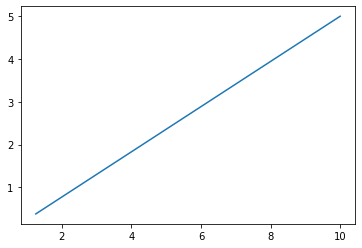

In [72]:
plt.plot(history_x1, history_x2)

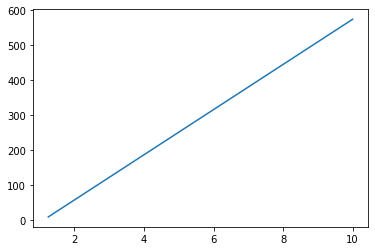

In [73]:
plt.plot(history_x1, history_val)